In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: #add8e6; padding: 10px;">
    <h1>Independent Data</h1>
</div>


Example : As a result of three different diet applications, each of which includes 12 individuals, the weight reductions of the individuals are found below.

In [266]:
data= {
    "A": [2.00, 12.00, 5.00, 4.00, 26.00, 8.00, 17.00, 4.00, 25.00, 6.00, 21.00, 6.00],
    "B": [17.00, 15.00, 3.00, 19.00, 5.00, 14.00, 5.00, 6.00, 19.00, 4.00, 9.00, 7.00],
    "C": [29.00, 3.00, 25.00, 28.00, 11.00, 7.00, 5.00, 25.00, 32.00, 24.00, 36.00, 20.00]
}

df_independent = pd.DataFrame(data)
print(df_independent)

       A     B     C
0    2.0  17.0  29.0
1   12.0  15.0   3.0
2    5.0   3.0  25.0
3    4.0  19.0  28.0
4   26.0   5.0  11.0
5    8.0  14.0   7.0
6   17.0   5.0   5.0
7    4.0   6.0  25.0
8   25.0  19.0  32.0
9    6.0   4.0  24.0
10  21.0   9.0  36.0
11   6.0   7.0  20.0


Descriptive statistics

In [267]:
summary_statistics = df_independent.describe()
print(summary_statistics)

               A          B          C
count  12.000000  12.000000  12.000000
mean   11.333333  10.250000  20.416667
std     8.689945   6.121868  11.171867
min     2.000000   3.000000   3.000000
25%     4.750000   5.000000  10.000000
50%     7.000000   8.000000  24.500000
75%    18.000000  15.500000  28.250000
max    26.000000  19.000000  36.000000


Diet A has a higher mean than the others.

The standard deviation of Diet B is lower than the others, which may indicate that the distribution is tighter.

The minimum value of Diet C is higher than the other variables. This may indicate that Diet C has higher values overall.

GRAPHICS

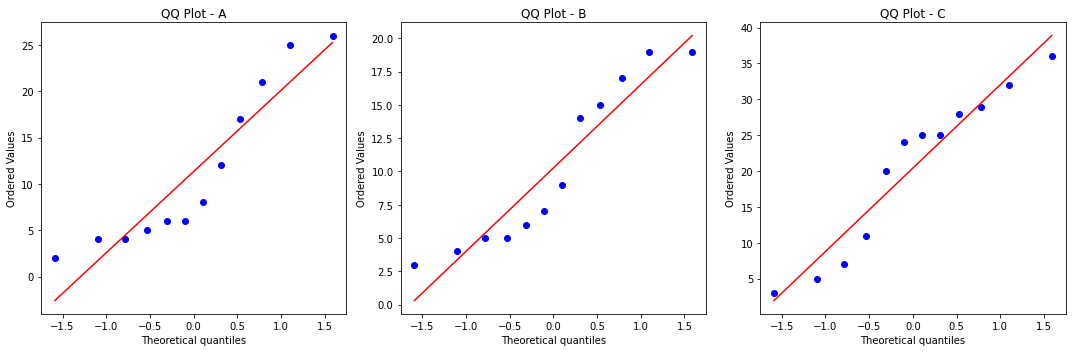

In [268]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats

df = pd.DataFrame(df_independent)

fig = make_subplots(rows=2, cols=1, subplot_titles=("Box Plots", "Violin Plots"))

for column in df.columns:
    box_trace = go.Box(y=df[column], name=f'{column} Box Plot')
    fig.add_trace(box_trace, row=1, col=1)

for column in df.columns:
    violin_trace = go.Violin(y=df[column], name=f'{column} Violin Plot')
    fig.add_trace(violin_trace, row=2, col=1)

fig.update_layout(height=600, width=800, showlegend=False, title_text="Box Plots and Violin Plots")
fig.show()


df = pd.DataFrame(data)
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, column in enumerate(df.columns):
    _, (slope, intercept, r) = stats.probplot(df[column], plot=axes[i], fit=True)
    axes[i].set_title(f'QQ Plot - {column}')

    for j, val in enumerate(df[column].sample(5)):
        axes[i].annotate(f'{val:.2f}', xy=(val, slope * val + intercept),
                         xytext=(-15, 7), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

ASSUMPTION OF NORMALITY

In [269]:
import pandas as pd
from scipy.stats import shapiro

print("Null Hypothesis (H0): The data set is normally distributed.")
print("Alternative Hypothesis (H1): The data set is not normally distributed.\n")

alpha = 0.05

for column in df_independent.columns:
    statistic, p_value = shapiro(df[column])
    print(f"\nShapiro-Wilk test for column '{column}':\n"
          f"   Null Hypothesis (H0): The data set is normally distributed.\n"
          f"   Alternative Hypothesis (H1): The data set is not normally distributed.")

    if p_value < alpha:
        print(f"   Result: p-value = {p_value:.4f}. Reject the null hypothesis. The data set is not normally distributed.")
    else:
        print(f"   Result: p-value = {p_value:.4f}. Fail to reject the null hypothesis. The data set is normally distributed.")


Null Hypothesis (H0): The data set is normally distributed.
Alternative Hypothesis (H1): The data set is not normally distributed.


Shapiro-Wilk test for column 'A':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.0409. Reject the null hypothesis. The data set is not normally distributed.

Shapiro-Wilk test for column 'B':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.0676. Fail to reject the null hypothesis. The data set is normally distributed.

Shapiro-Wilk test for column 'C':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.2308. Fail to reject the null hypothesis. The data set is normally distributed.


H0 cannot be rejected because P-value: 0.0409<0.05 at 95% confidence interval in diet A. The data set is not normally distributed.
    
Nonparametric tests will be preferred.

<div style="text-align: center; background-color: #add8e6; padding: 10px;">
    <h1>Dependent Data</h1>
</div>


Example : Seven stores are selected for a marketing research. In each store, five different brands new type of hand lotion side by side. The number of bottles of lotion sold for each brand at the end of the week is as follows 
tabulated with the results.

In [270]:
data = {
    "A": [5.00, 1.00, 16.00, 5.00, 10.00, 19.00, 10.00],
    "B": [4.00, 3.00, 12.00, 4.00, 9.00, 18.00, 7.00],
    "C": [7.00, 1.00, 22.00, 3.00, 7.00, 28.00, 6.00],
    "D": [10.00, 0.00, 22.00, 5.00, 13.00, 37.00, 8.00],
    "E": [12.00, 2.00, 35.00, 4.00, 10.00, 58.00, 7.00]
}
df_dependent = pd.DataFrame(data)
print(df_dependent)

      A     B     C     D     E
0   5.0   4.0   7.0  10.0  12.0
1   1.0   3.0   1.0   0.0   2.0
2  16.0  12.0  22.0  22.0  35.0
3   5.0   4.0   3.0   5.0   4.0
4  10.0   9.0   7.0  13.0  10.0
5  19.0  18.0  28.0  37.0  58.0
6  10.0   7.0   6.0   8.0   7.0


Descriptive statistics

In [271]:
summary_statistics = df_dependent.describe()
print(summary_statistics)

               A          B          C          D          E
count   7.000000   7.000000   7.000000   7.000000   7.000000
mean    9.428571   8.142857  10.571429  13.571429  18.285714
std     6.399405   5.398412  10.244627  12.394315  20.661674
min     1.000000   3.000000   1.000000   0.000000   2.000000
25%     5.000000   4.000000   4.500000   6.500000   5.500000
50%    10.000000   7.000000   7.000000  10.000000  10.000000
75%    13.000000  10.500000  14.500000  17.500000  23.500000
max    19.000000  18.000000  28.000000  37.000000  58.000000


Brand A has a median value of 10 and is similar to its mean, which may indicate a normal distribution.

Brand C has a median value of 7, but its mean is higher. This may indicate that C may have a right-skewed distribution.

The standard deviation of brand E is significantly higher than the other brands. This indicates that the values of brand E are generally further apart and have a wider distribution.

GRAPHICS

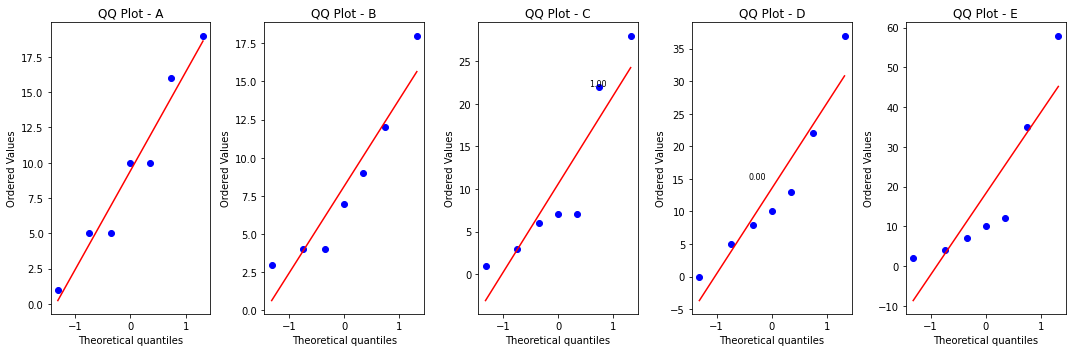

In [272]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

df = pd.DataFrame(df_dependent)

fig = make_subplots(rows=2, cols=1, subplot_titles=("Box Plots", "Violin Plots"))

for column in df.columns:
    box_trace = go.Box(y=df[column], name=f'{column} Box Plot')
    fig.add_trace(box_trace, row=1, col=1)

for column in df.columns:
    violin_trace = go.Violin(y=df[column], name=f'{column} Violin Plot')
    fig.add_trace(violin_trace, row=2, col=1)

fig.update_layout(height=600, width=800, showlegend=False, title_text="Box Plots and Violin Plots")
fig.show()


df = pd.DataFrame(data)
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, column in enumerate(df.columns):
    _, (slope, intercept, r) = stats.probplot(df[column], plot=axes[i], fit=True)
    axes[i].set_title(f'QQ Plot - {column}')

    for j, val in enumerate(df[column].sample(5)):
        axes[i].annotate(f'{val:.2f}', xy=(val, slope * val + intercept),
                         xytext=(-15, 7), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

ASSUMPTION OF NORMALITY

In [273]:
import pandas as pd
from scipy.stats import shapiro

print("Null Hypothesis (H0): The data set is normally distributed.")
print("Alternative Hypothesis (H1): The data set is not normally distributed.\n")

alpha = 0.05

for column in df_dependent.columns:
    statistic, p_value = shapiro(df[column])
    print(f"\nShapiro-Wilk test for column '{column}':\n"
          f"   Null Hypothesis (H0): The data set is normally distributed.\n"
          f"   Alternative Hypothesis (H1): The data set is not normally distributed.")

    if p_value < alpha:
        print(f"   Result: p-value = {p_value:.4f}. Reject the null hypothesis. The data set is not normally distributed.")
    else:
        print(f"   Result: p-value = {p_value:.4f}. Fail to reject the null hypothesis. The data set is normally distributed.")


Null Hypothesis (H0): The data set is normally distributed.
Alternative Hypothesis (H1): The data set is not normally distributed.


Shapiro-Wilk test for column 'A':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.7030. Fail to reject the null hypothesis. The data set is normally distributed.

Shapiro-Wilk test for column 'B':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.2758. Fail to reject the null hypothesis. The data set is normally distributed.

Shapiro-Wilk test for column 'C':
   Null Hypothesis (H0): The data set is normally distributed.
   Alternative Hypothesis (H1): The data set is not normally distributed.
   Result: p-value = 0.0641. Fail to reject the null hypothesis. The data set is normally distributed.

Shapiro-Wilk test for column 'D':
   Null 

<div style="text-align: center; background-color: #add8e6; padding: 10px;">
    <h1>Trend Veri</h1>
</div>


It is estimated that the rate of urbanisation in Turkey increased between 1960 and 2010 due to the fact that industry and labour force are more concentrated in cities. Accordingly, a statistical analysis will be carried out on the urbanisation rate data for this period.

Data are taken from https://ourworldindata.org/grapher/share-of-population-urban?tab=chart&time=earliest..2000&country=~TUR.

In [274]:
df_trend = pd.read_csv("share-of-population-urban.csv")
# df_trend

In [275]:
df_trend = df_trend[(df_trend["Entity"] == "Turkey") & (df_trend["Year"].isin(range(1960, 2011)))][["Urban population (% of total population)","Entity","Year"]]
#df_trend

Observations in Turkey between 1960-2000 are filtered from the data above.

In [276]:
summary_statistics = df_trend.describe()
print(summary_statistics)

       Urban population (% of total population)         Year
count                                 51.000000    51.000000
mean                                  51.530059  1985.000000
std                                   12.981143    14.866069
min                                   31.515000  1960.000000
25%                                   39.929000  1972.500000
50%                                   52.448000  1985.000000
75%                                   63.441000  1997.500000
max                                   70.825000  2010.000000


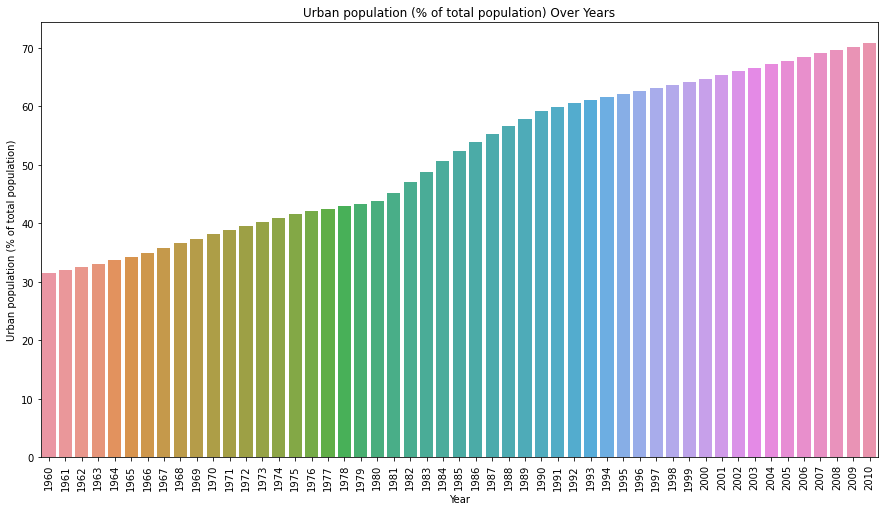

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Urban population (% of total population)', data=df_trend) ## Varsayılan palette kullanılmıştır.
plt.title('Urban population (% of total population) Over Years')
plt.xlabel('Year')
plt.ylabel('Urban population (% of total population)')
plt.xticks(rotation=90)
plt.show()

In [278]:
from scipy.stats import kstest

statistic, p_value = kstest(df_trend["Urban population (% of total population)"], 'norm')

print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Sample data follows a normal distribution (H0 cannot be rejected)")
else:
    print("Sample data does not follow a normal distribution (H0 is rejected)")


Test Statistic: 1.0000
P-value: 0.0000
Sample data does not follow a normal distribution (H0 is rejected)


<div style="text-align: center; background-color: lightgreen; padding: 10px;">
    <h1>Tests</h1>
</div>


One Sample Location Test

𝐻0: 𝜃A = 20

𝐻1: 𝜃A > 20

In [279]:
print("df_independent  : ",df_independent["A"])
alleged = 20
nPlus = len([x for x in df_independent["A"] if x > alleged])
nNeg = len([x for x in df_independent["A"] if x < alleged])
n = nPlus + nNeg

print("+  -> ",nPlus)
print("-  -> ",nNeg)

df_independent  :  0      2.0
1     12.0
2      5.0
3      4.0
4     26.0
5      8.0
6     17.0
7      4.0
8     25.0
9      6.0
10    21.0
11     6.0
Name: A, dtype: float64
+  ->  3
-  ->  9


.

Sign Test

In [280]:
from scipy.stats import binom_test
p_value = stats.binomtest(nPlus, n, p=0.5, alternative='greater')
p_value

BinomTestResult(k=3, n=12, alternative='greater', statistic=0.25, pvalue=0.980712890625)

In [281]:
p_value = p_value.pvalue
alpha = 0.05
if p_value > alpha:
    decision = f"The obtained p-value is greater than {alpha}.\n"
else:
    decision = f"The obtained p-value is equal to or less than {alpha}.\n"

print(decision)
print(f"Sign Test Result: p-value = {p_value}")


The obtained p-value is greater than 0.05.

Sign Test Result: p-value = 0.980712890625


It can be stated with 95% confidence level that the median is not greater than 20.

.

Wilcoxon Signed-Rank Test

In [282]:
from scipy.stats import wilcoxon
result = wilcoxon([x - alleged for x in df_independent["C"]], alternative='greater',method='exact', correction=True)
result

WilcoxonResult(statistic=32.5, pvalue=0.5354585807761036)

In [283]:
p_value = result.pvalue
alpha = 0.05
if p_value > alpha:
    decision = f"The obtained p-value is greater than {alpha}.\n"
else:
    decision = f"The obtained p-value is equal to or less than {alpha}.\n"

print(decision)
print(f"Wilcoxon Test Sonucu: p-value = {p_value}")

The obtained p-value is greater than 0.05.

Wilcoxon Test Sonucu: p-value = 0.5354585807761036


Mann-Whitney U Test

𝐻0: 𝜃A - 𝜃C = 0

𝐻1: 𝜃A - 𝜃C < 0


In [284]:
from scipy import stats
result = stats.mannwhitneyu(df_independent["A"], df_independent["C"], alternative='less')

U1 = result.statistic
U2 = len(df_independent["A"]) * len(df_independent["C"]) - U1

print(f"Test statistics: {result.statistic}")
print(f"P-value: {result.pvalue}")

Test statistics: 38.5
P-value: 0.02818515194903695


In [285]:
p_value = result.pvalue
alpha = 0.05

if p_value > alpha:
    decision = f"The obtained p-value is greater than {alpha}. There is no statistically significant difference between the two groups.\n"
else:
    decision = f"The obtained p-value is equal to or less than {alpha}. There is a statistically significant difference between the two groups.\n"

print(f"Mann-Whitney U Test Result: p-value = {p_value}\n")
print(decision)


Mann-Whitney U Test Result: p-value = 0.02818515194903695

The obtained p-value is equal to or less than 0.05. There is a statistically significant difference between the two groups.



There is no statistically significant difference between the medians of diet A and diet C.

.

W;ilcoxon Tests

𝐻0: 𝜃A - 𝜃B = 0

𝐻1: 𝜃A - 𝜃B > 0

In [286]:
from scipy.stats import wilcoxon
wilcoxon_result = stats.wilcoxon(df_dependent['A'], df_dependent['B'], alternative = 'greater',  method='exact', correction=True)
wilcoxon_result

WilcoxonResult(statistic=23.0, pvalue=0.078125)

In [287]:
wilcoxon_p_value = wilcoxon_result.pvalue
alpha_wilcoxon = 0.05

if wilcoxon_p_value > alpha_wilcoxon:
    wilcoxon_decision = f"The obtained p-value is greater than {alpha_wilcoxon}. There is no statistically significant difference between the two groups.\n"
else:
    wilcoxon_decision = f"The obtained p-value is equal to or less than {alpha_wilcoxon}. There is a statistically significant difference between the two groups.\n"

print(f"Wilcoxon Test Result: p-value = {wilcoxon_p_value}\n")
print(wilcoxon_decision)


Wilcoxon Test Result: p-value = 0.078125

The obtained p-value is greater than 0.05. There is no statistically significant difference between the two groups.



It cannot be said that the number of lotion bottles sold in brand A is more than the number of lotion bottles sold in brand B.

.

Bağımsız K Örneklem Konum Testi

𝐻0: 𝜃1 = 𝜃2 = 𝜃3 

𝐻1: 𝜃𝑖 ≠ 𝜃𝑗 (At least one pair differs.)


In [288]:
from scipy.stats import kruskal
result = stats.kruskal(df_independent["A"], df_independent["B"], df_independent["C"])
result

KruskalResult(statistic=6.138031594352627, pvalue=0.04646686517954499)

In [289]:
kruskal_p_value = result.pvalue
alpha_kruskal = 0.05

if kruskal_p_value > alpha_kruskal:
    kruskal_decision = f"Elde edilen p değeri {alpha_kruskal}'ten büyüktür. Gruplar arasında istatistiksel olarak anlamlı bir farklılık bulunmamaktadır.\n"
else:
    kruskal_decision = f"Elde edilen p değeri {alpha_kruskal}'e eşit veya daha küçüktür. Gruplar arasında istatistiksel olarak anlamlı bir farklılık bulunmaktadır.\n"

print(f"Kruskal-Wallis Test Sonucu: p-value = {kruskal_p_value}\n")
print(kruskal_decision)

Kruskal-Wallis Test Sonucu: p-value = 0.04646686517954499

Elde edilen p değeri 0.05'e eşit veya daha küçüktür. Gruplar arasında istatistiksel olarak anlamlı bir farklılık bulunmaktadır.



There is a statistically significant difference between diets A, B and C.

Post-hoc tests are used to find the difference between the groups.

In [290]:
from scikit_posthocs import posthoc_dunn
# https://www.theanalysisfactor.com/dunns-test-post-hoc-test-after-kruskal-wallis/

kruskal_stat, p_value = kruskal(df_independent['A'], df_independent['B'], df_independent['C'])

posthoc_dunn_result = posthoc_dunn(df_independent.melt(value_name='value', var_name='groups'), val_col='value', group_col='groups')

print("Kruskal-Wallis Test Statistic:", kruskal_stat)
print("P-value:", p_value)
print("\nDunn's Post-Hoc Test Results:")
print(posthoc_dunn_result)

Kruskal-Wallis Test Statistic: 6.138031594352627
P-value: 0.04646686517954499

Dunn's Post-Hoc Test Results:
          A         B         C
A  1.000000  0.853725  0.040614
B  0.853725  1.000000  0.025627
C  0.040614  0.025627  1.000000


There is a significant difference between diets A-C and B-C at 95% confidence level.

.

Friedman tes

𝐻0: 𝜃1 = 𝜃2 = 𝜃3 = 𝜃4 = 𝜃5
    
𝐻1: 𝜃𝑖 ≠ 𝜃𝑗 (At least one pair differs.)


In [291]:
from scipy.stats import friedmanchisquare
result = stats.friedmanchisquare(df_dependent["A"], df_dependent["B"], df_dependent["C"], df_dependent["D"], df_dependent["E"])
result

FriedmanchisquareResult(statistic=8.328358208955212, pvalue=0.08026409058182589)

In [292]:
friedman_p_value = result.pvalue
alpha_friedman = 0.05

if friedman_p_value > alpha_friedman:
    friedman_decision = f"The obtained p-value is greater than {alpha_friedman}. There is no statistically significant difference between the groups.\n"
else:
    friedman_decision = f"The obtained p-value is equal to or less than {alpha_friedman}. There is a statistically significant difference between the groups.\n"

print(f"Friedman Test Result: p-value = {friedman_p_value}\n")
print(friedman_decision)


Friedman Test Result: p-value = 0.08026409058182589

The obtained p-value is greater than 0.05. There is no statistically significant difference between the groups.



There is no need for a post-hoc test, but the results are given below in order to see the results in post-hoc tests.

In [293]:
from scikit_posthocs import posthoc_dunn

friedman_stat, p_value_friedman = friedmanchisquare(df_dependent['A'], df_dependent['B'],
                                                    df_dependent['C'], df_dependent['D'],
                                                    df_dependent['E'])

posthoc_dunn_result_friedman = posthoc_dunn(df_dependent.melt(value_name='value', var_name='groups'),
                                             val_col='value', group_col='groups')

print("Friedman Test Statistic:", friedman_stat)
print("P-value:", p_value_friedman)
print("\nDunn's Post-Hoc Test Results:")
print(posthoc_dunn_result_friedman)

Friedman Test Statistic: 8.328358208955212
P-value: 0.08026409058182589

Dunn's Post-Hoc Test Results:
          A         B         C         D         E
A  1.000000  0.694977  0.814002  0.628668  0.637975
B  0.694977  1.000000  0.875368  0.381186  0.388334
C  0.814002  0.875368  1.000000  0.472222  0.480314
D  0.628668  0.381186  0.472222  1.000000  0.989572
E  0.637975  0.388334  0.480314  0.989572  1.000000


As can be understood from the results here, it cannot be said that there is no difference between the groups.

Mann-Kendall Test

Ho : There is no trend
    
Hs : There is a trend / There is an increasing trend / There is a decreasing trend 

In [294]:
import pandas as pd
import pymannkendall as mk
## https://pypi.org/project/pymannkendall/

result = mk.original_test(df_trend["Urban population (% of total population)"], alpha=0.05)
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.347696957557925, Tau=1.0, s=1275.0, var_s=15158.333333333334, slope=0.8374545454545451, intercept=31.511636363636374)


In [295]:
trend_type = result.trend  

if trend_type == 'increasing':
    kendall_decision = "Mann-Kendall Test Result: There is an increasing trend."
elif trend_type == 'decreasing':
    kendall_decision = "Mann-Kendall Test Result: There is a decreasing trend."
else:
    kendall_decision = "Mann-Kendall Test Result: There is no trend."

kendall_p_value = result.p  
alpha_kendall = 0.05

if kendall_p_value > alpha_kendall:
    kendall_decision += f"\nThe obtained p-value is greater than {alpha_kendall}. There is no statistically significant relationship."
else:
    kendall_decision += f"\nThe obtained p-value is equal to or less than {alpha_kendall}. There is a statistically significant relationship."

print(kendall_decision)


Mann-Kendall Test Result: There is an increasing trend.
The obtained p-value is equal to or less than 0.05. There is a statistically significant relationship.


.